# Sentiment Analysis of Financial News Headlines
## Applying  NLP techniques to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [1]:
import re

import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
# import text_hammer as th
# nltk imports
import nltk
# nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize  # tokenize the text == the text is splitted into words in list
from nltk.corpus import stopwords  # this contain common stop words that has no effect in analysis
from nltk.stem import WordNetLemmatizer  # Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # bags of words and TF IDF
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer  # classification Metrics
from sklearn.naive_bayes import MultinomialNB  # Multiclassification

## 2. Load the dataset [1 point]

In [2]:
data = pd.read_csv('sentiment.csv ',encoding='latin',header=None)

## 3. Explore the dataset [10 points]

In [3]:

data.columns =['Sentiment', 'Text']
data.head(10)

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


In [4]:
data['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

## 4. Clean the data [5 points]

In [5]:
stop_words = [i for i in stopwords.words('english') if "n't" not in i and i not in ('not','no')]
def process_text(text):
    
    text = word_tokenize(text) # tokenize words in text
    text = [re.sub('[^A-Za-z]+', '', word) for word in text] # this line substitutes any white space before the word by removing the space
    text = [word.lower() for word in text if word.isalpha()] # lower each word in text
    text = [word for word in text if word not in stop_words]
    text = [WordNetLemmatizer().lemmatize(word) for word in text] # lemmatization of words, so when see persons an person, both are dealt as one word person
    text = ' '.join(text) # join words into text again
    return text

In [6]:
data.Text = data.Text.apply(process_text)
data.Text

0       according gran company no plan move production...
1       technopolis plan develop stage area no le squa...
2       international electronic industry company elco...
3       new production plant company would increase ca...
4       according company updated strategy year baswar...
                              ...                        
4841    london marketwatch share price ended lower lon...
4842    rinkuskiai beer sale fell per cent million lit...
4843    operating profit fell eur mn eur mn including ...
4844    net sale paper segment decreased eur mn second...
4845    sale finland decreased january sale outside fi...
Name: Text, Length: 4846, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
data['Sentiment'] = lab.fit_transform(data['Sentiment'])
data['Sentiment'].value_counts()
#1-neutral
#2-positive
#3 negative

1    2879
2    1363
0     604
Name: Sentiment, dtype: int64

In [8]:
# !pip install wordcloud

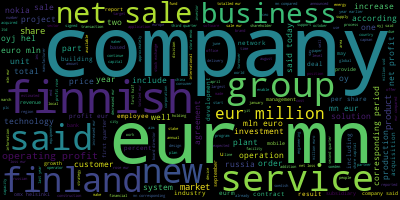

In [9]:
#Generating word cloud(for curiosity)
from wordcloud  import WordCloud
corpus=' '.join(data['Text'])
word_cloud=WordCloud().generate(corpus)
img=word_cloud.to_image()
img

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [22]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

## 6. BoW model [15 points]

In [32]:
BOW_dt = Pipeline([("vect", CountVectorizer(max_features = 1500,ngram_range=(1,3))),('smote', SMOTE(random_state=12)),("clf",DecisionTreeClassifier())])
BOW_NB = Pipeline([("vect", CountVectorizer(max_features = 1500,ngram_range=(1,3))),('smote', SMOTE(random_state=12)),("clf",MultinomialNB())])

## 7. Tf-idf model [15 points]

In [24]:
textclassifier_mnb =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB(alpha =0.1))
])
textclassifier_dt = Pipeline([
    ("vect", CountVectorizer()),
    ('smote', SMOTE(random_state=12)),
    ("clf",DecisionTreeClassifier())])

## 8. Split train test data [3 points]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'],
                               data['Sentiment'],stratify=data['Sentiment'], random_state=12
)

textclassifier_mnb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(random_state=12)),
                ('mnb', MultinomialNB(alpha=0.1))])

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [16]:
y_pred=textclassifier_mnb.predict(X_test)

## 10. Another Classification Algorithm [10 points]
- Train
- Predict

## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

In [19]:
from sklearn.metrics import accuracy_score
mnb_acc=accuracy_score(y_test,y_pred)
mnb_acc

0.6749174917491749

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 99  35  17]
 [ 54 552 114]
 [ 54 120 167]]


In [29]:
textclassifier_dt.fit(X_train, y_train)
y_pred=textclassifier_dt.predict(X_test)
dt_acc=accuracy_score(y_test,y_pred)
dt_acc

0.5833333333333334

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 82  39  30]
 [128 428 164]
 [ 53  91 197]]


In [33]:
BOW_dt.fit(X_train, y_train)
y_pred=BOW_dt.predict(X_test)
BOWdt_acc=accuracy_score(y_test,y_pred)
BOWdt_acc

0.5602310231023102

In [34]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 79  36  36]
 [136 410 174]
 [ 53  98 190]]


In [35]:
BOW_NB.fit(X_train, y_train)
y_pred=BOW_NB.predict(X_test)
BOW_NB_acc=accuracy_score(y_test,y_pred)
BOW_NB_acc

0.6798679867986799

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 67  63  21]
 [ 32 625  63]
 [ 42 167 132]]
